In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.datasets import make_blobs

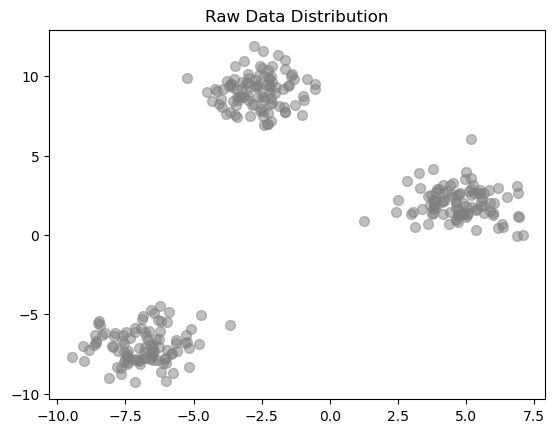

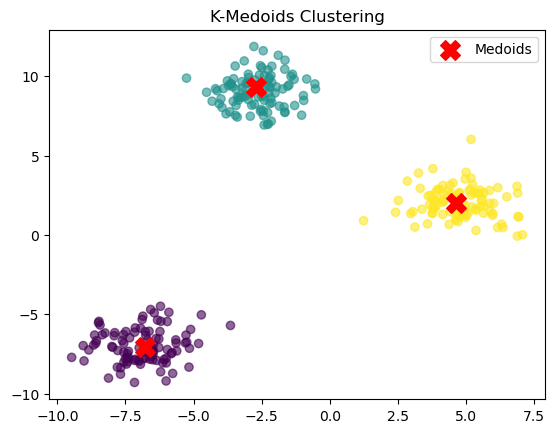

In [4]:
# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.05, random_state=42)
# Visualizing raw data
plt.scatter(X[:, 0], X[:, 1], s=50, c='gray', alpha=0.5)
plt.title("Raw Data Distribution")
plt.show()
# Apply K-Medoids clustering
k = 3
kmedoids = KMedoids(n_clusters=k, metric='euclidean', random_state=42)
kmedoids.fit(X)
# Get cluster labels and medoids
labels = kmedoids.labels_
medoids = kmedoids.cluster_centers_
# Plot clustered data
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(medoids[:, 0], medoids[:, 1], c='red', marker='X', s=200, label='Medoids')
plt.title("K-Medoids Clustering")
plt.legend()
plt.show()

In [5]:
from sklearn.metrics import silhouette_score

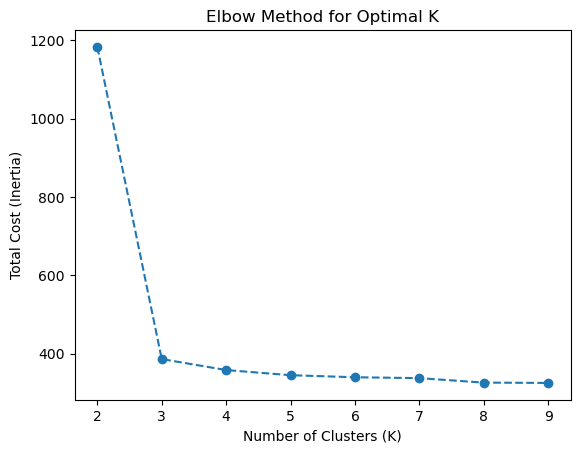

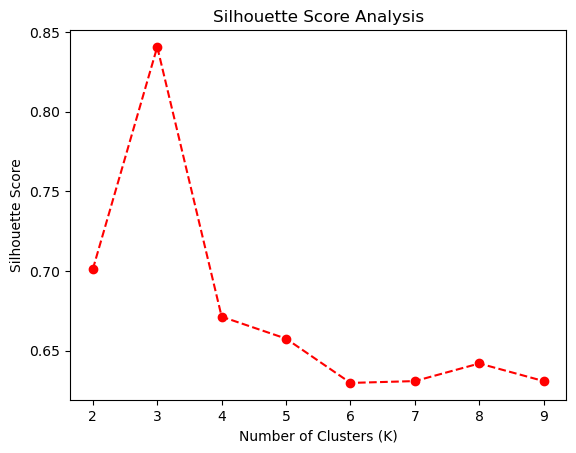

In [6]:
costs = []
sil_scores = []
k_values = range(2, 10)
for k in k_values:
    kmedoids = KMedoids(n_clusters=k, metric='euclidean', random_state=42)
    kmedoids.fit(X)
    costs.append(kmedoids.inertia_)  # Inertia: total distance from medoids
    sil_scores.append(silhouette_score(X, kmedoids.labels_))
# Plot Elbow Method
plt.plot(k_values, costs, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Total Cost (Inertia)")
plt.title("Elbow Method for Optimal K")
plt.show()
# Plot Silhouette Score
plt.plot(k_values, sil_scores, marker='o', linestyle='--', color='red')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Analysis")
plt.show()

In [14]:
import pandas as pd

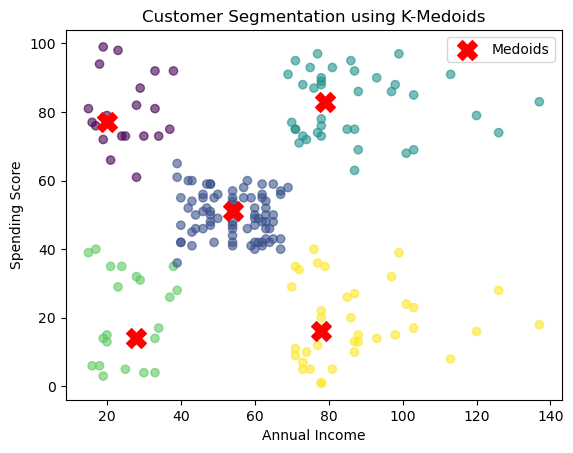

In [16]:
# Load dataset

df = pd.read_csv("C:/Users/ABHISHEK/Downloads/5c05f43d2351249927b8a3f3cc3e5ecf-8bd6144a87988213693754baaa13fb204933282d/5c05f43d2351249927b8a3f3cc3e5ecf-8bd6144a87988213693754baaa13fb204933282d/Mall_Customers.csv")
# Select features: Annual Income & Spending Score
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values
# Apply K-Medoids
kmedoids = KMedoids(n_clusters=5, metric='manhattan', random_state=42)
kmedoids.fit(X)
# Get labels and medoids
labels = kmedoids.labels_
medoids = kmedoids.cluster_centers_
# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(medoids[:, 0], medoids[:, 1], c='red', marker='X', s=200, label='Medoids')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Customer Segmentation using K-Medoids")
plt.legend()
plt.show()